# Database
[Available at Gdrive](https://drive.google.com/drive/folders/1siq0kTyjfqAUDNefl4sXw8epz-fk-_gb?usp=sharing)

# Creation


The database was created using [MatPower](https://matpower.org/), the source can be found at [GitHub](https://github.com/IceMerman/NN_validation/tree/master/Demanda)


In [ ]:
# libraries
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
ruta = '/content/drive/MyDrive/Colab Notebooks/db10000.mat'

Mounted at /content/drive


In [ ]:
# DB must be loaded to the colab space
ruta='/content/db10000.mat'
mat = loadmat(ruta)
labels = mat['issecure']
VM = mat['VM']
VA = mat['VA']
pgen = mat['Pgen']
qgen = mat['Qgen']
SLOAD = mat['SLOAD']

print(labels.shape)
print(qgen.shape)
print(pgen.shape)
print(type(pgen))

(1, 5000)
(13, 5000)
(13, 5000)
<class 'numpy.ndarray'>


In [ ]:
samples, powers = SLOAD.shape
pl = SLOAD[:, :powers//2]
ql = SLOAD[:, powers//2:]
print(type(SLOAD))

pl.shape

<class 'numpy.ndarray'>


(5000, 19)

**Se convierte en format DataFrame (Pandas)**

In [ ]:
columnas = ['Gen1', 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6', 'Gen7', 'Gen8', 'Gen9', 'Gen10', "DNA1", "DNA2", "DNA3"]
# Se realizan las traposiciones necesarias (filas: observaciones - Columnas: características)
Pgen =np.transpose(pgen, axes=None)
Qgen =np.transpose(qgen, axes=None)
Labels = np.transpose(labels, axes=None)

# Se convierte a formato Pandas:
df_Pgen = pd.DataFrame(Pgen, columns = columnas)
df_Qgen = pd.DataFrame(Qgen, columns = columnas)
df_Pload = pd.DataFrame(pl, columns = None)
df_Qload = pd.DataFrame(ql, columns = None)

#df_Pgen.head(10)
#df_Qgen.head(10)
df_Pload.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,395.789857,584.008939,300.589873,637.089603,8.020732,371.395407,403.865157,168.594383,732.661799,365.165126,265.731146,373.591690,265.473947,172.215368,328.297977,183.493118,296.267882,10.335083,1406.369604
1,270.102900,368.866042,186.599545,404.927973,5.725054,212.787615,265.495650,127.283511,394.473732,197.065784,170.719172,228.674868,151.595890,102.377966,214.925174,152.263391,205.039554,5.872474,870.938456
2,220.566743,331.338503,173.743110,313.214035,5.211940,214.306677,219.434855,109.116334,467.189642,165.235019,180.065534,184.370140,134.481712,85.766719,196.371351,123.533039,192.145378,6.129073,788.314577
3,224.921154,363.909621,176.091068,336.561608,4.206552,239.284907,222.600710,93.893899,407.392991,169.026044,178.008064,213.799287,149.981074,92.387613,173.257983,145.830220,192.320231,5.809603,767.206269
4,365.589167,673.874851,212.586209,595.427588,9.864849,354.563669,362.296995,160.366387,802.039898,260.556393,264.056306,370.860324,254.436346,163.792693,325.047887,246.135862,291.320626,10.310405,1233.573673
5,209.545055,378.312212,167.979031,379.388490,5.255963,223.905406,212.166594,113.318449,420.171526,173.974850,156.752867,229.928774,167.040380,81.968269,192.960919,145.078382,187.432690,6.620646,839.394316
6,304.958374,554.792127,207.304071,572.724944,8.859731,367.025067,351.142512,160.512459,726.147570,315.074218,261.811976,371.137107,220.543579,121.633620,280.356615,213.017300,291.982495,8.777873,1436.559345
7,383.521611,576.647561,270.185743,754.242290,8.295776,391.453106,367.194127,171.183476,737.349945,329.344741,265.388071,303.771663,256.880819,151.334772,330.728714,236.223169,345.518719,10.918778,1268.013160
8,252.793458,391.689941,170.664667,385.065322,6.312924,231.069596,241.382015,107.141502,449.589974,193.609067,208.021502,222.309647,156.131810,98.080024,220.327066,135.748740,220.871090,5.942028,872.561016
9,342.410635,523.855543,229.410562,497.942218,7.684112,328.904844,356.218975,144.135737,761.353625,298.436769,226.163171,352.443897,222.336999,146.630089,300.023219,199.013999,229.449618,9.712759,1246.730632


*Se unen los datos de entrada con las etiquetas*

In [ ]:
df_Pgen['Status']=Labels
df_Qgen['Status']=Labels
df_Pload['Status']=Labels
df_Qload['Status']=Labels
df_Pload.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Status
0,395.789857,584.008939,300.589873,637.089603,8.020732,371.395407,403.865157,168.594383,732.661799,365.165126,265.731146,373.591690,265.473947,172.215368,328.297977,183.493118,296.267882,10.335083,1406.369604,0
1,270.102900,368.866042,186.599545,404.927973,5.725054,212.787615,265.495650,127.283511,394.473732,197.065784,170.719172,228.674868,151.595890,102.377966,214.925174,152.263391,205.039554,5.872474,870.938456,0
2,220.566743,331.338503,173.743110,313.214035,5.211940,214.306677,219.434855,109.116334,467.189642,165.235019,180.065534,184.370140,134.481712,85.766719,196.371351,123.533039,192.145378,6.129073,788.314577,1
3,224.921154,363.909621,176.091068,336.561608,4.206552,239.284907,222.600710,93.893899,407.392991,169.026044,178.008064,213.799287,149.981074,92.387613,173.257983,145.830220,192.320231,5.809603,767.206269,0
4,365.589167,673.874851,212.586209,595.427588,9.864849,354.563669,362.296995,160.366387,802.039898,260.556393,264.056306,370.860324,254.436346,163.792693,325.047887,246.135862,291.320626,10.310405,1233.573673,1
5,209.545055,378.312212,167.979031,379.388490,5.255963,223.905406,212.166594,113.318449,420.171526,173.974850,156.752867,229.928774,167.040380,81.968269,192.960919,145.078382,187.432690,6.620646,839.394316,0
6,304.958374,554.792127,207.304071,572.724944,8.859731,367.025067,351.142512,160.512459,726.147570,315.074218,261.811976,371.137107,220.543579,121.633620,280.356615,213.017300,291.982495,8.777873,1436.559345,1
7,383.521611,576.647561,270.185743,754.242290,8.295776,391.453106,367.194127,171.183476,737.349945,329.344741,265.388071,303.771663,256.880819,151.334772,330.728714,236.223169,345.518719,10.918778,1268.013160,0
8,252.793458,391.689941,170.664667,385.065322,6.312924,231.069596,241.382015,107.141502,449.589974,193.609067,208.021502,222.309647,156.131810,98.080024,220.327066,135.748740,220.871090,5.942028,872.561016,1
9,342.410635,523.855543,229.410562,497.942218,7.684112,328.904844,356.218975,144.135737,761.353625,298.436769,226.163171,352.443897,222.336999,146.630089,300.023219,199.013999,229.449618,9.712759,1246.730632,1


 **Análisis Exploratorio de los Datos (EDA)**

*Distribuciones para potencia activa para cada generador*

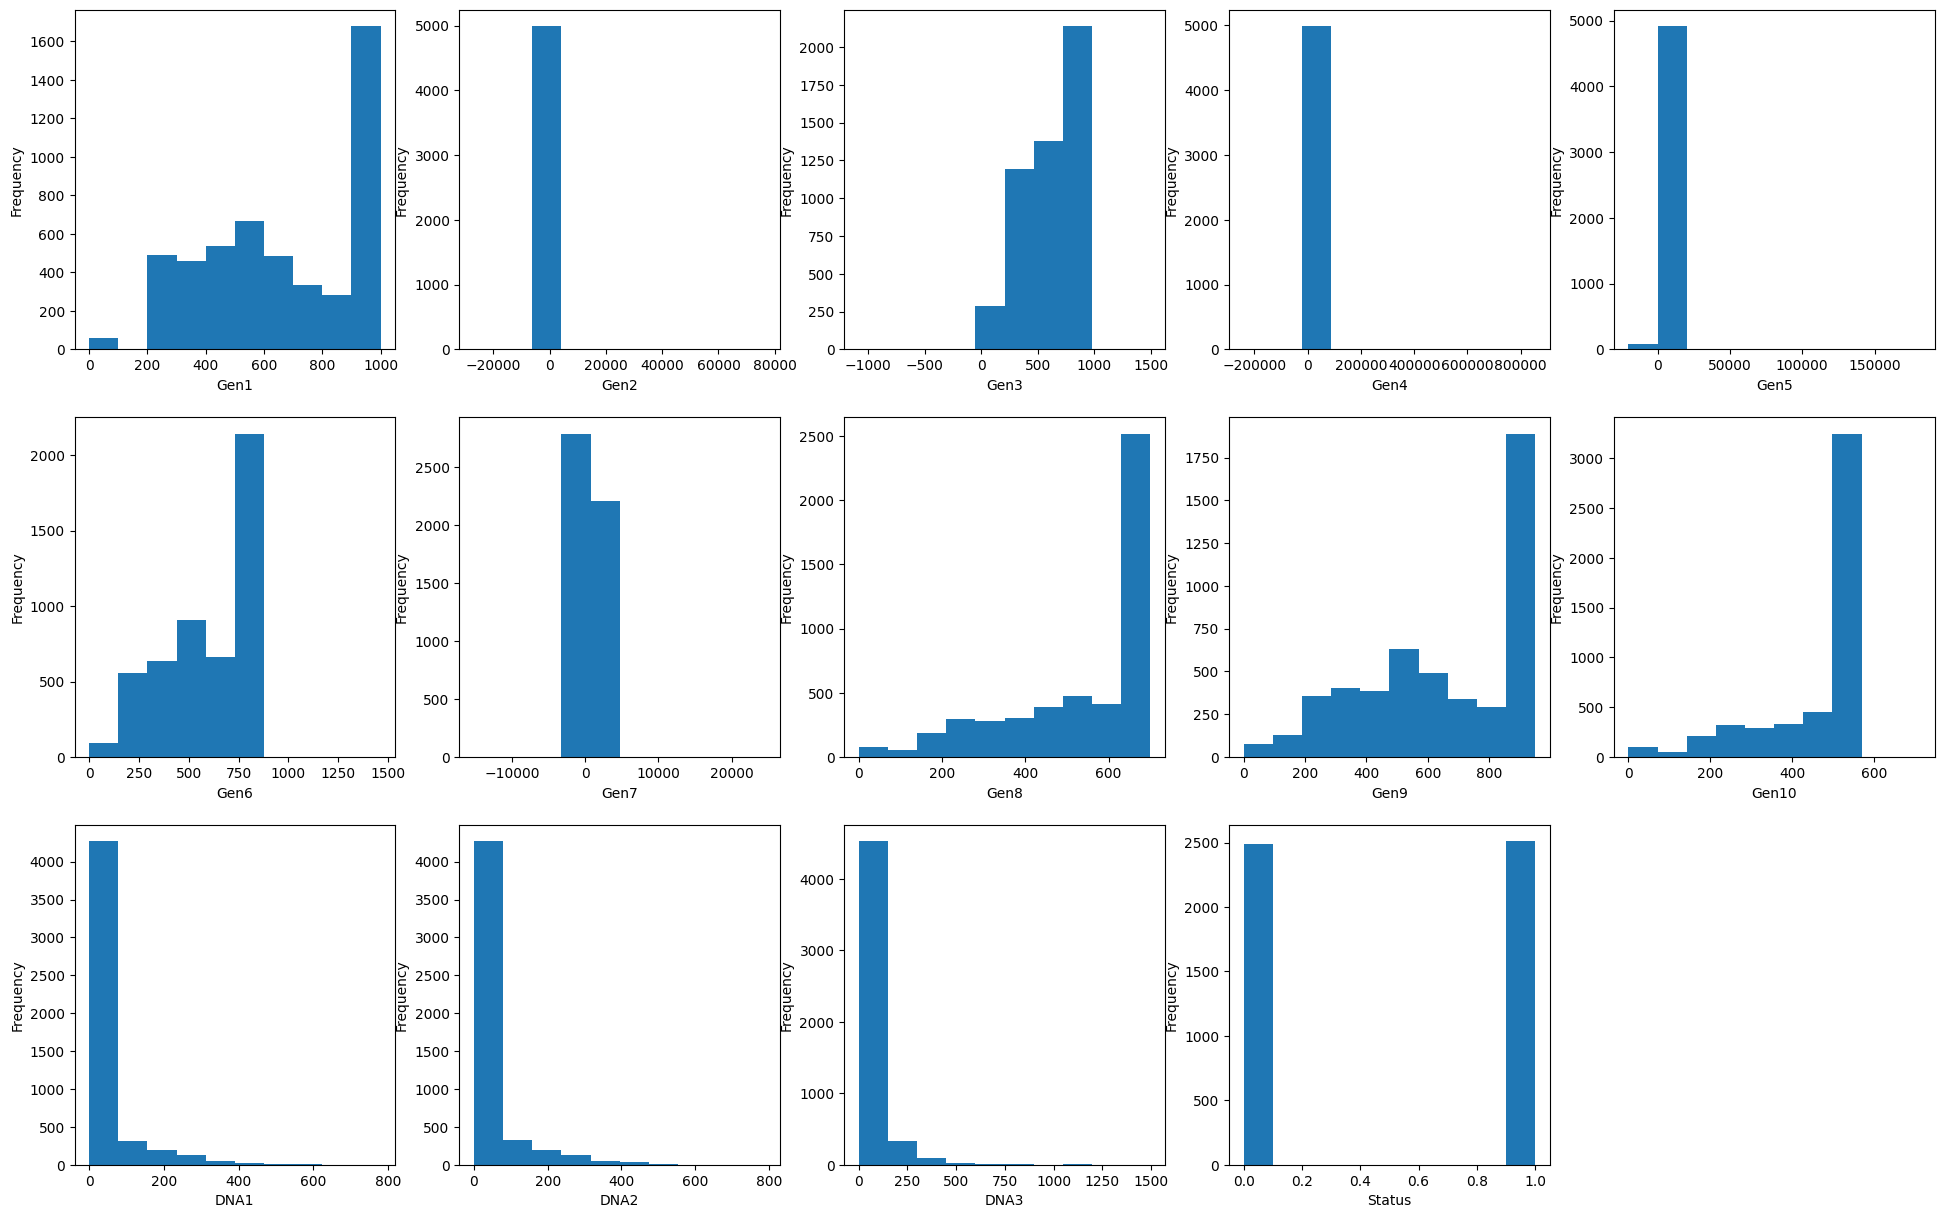

In [ ]:
fig =plt.figure(figsize=(24,15))
i = 0
for column in df_Pgen:
    sub = fig.add_subplot(3, 5,i + 1)
    sub.set_xlabel(column)
    df_Pgen[column].plot(kind = 'hist')
    i = i +1


<Axes: >

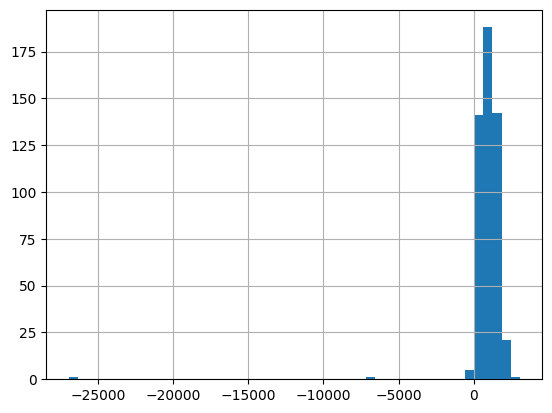

In [ ]:
df_Pgen['Gen2'][:500].hist(bins=50)
#df_Pgen['Gen2'][df_Pgen['Gen2']>0][:500].hist()


*Distribuciones de potencia reactva para cada generador*



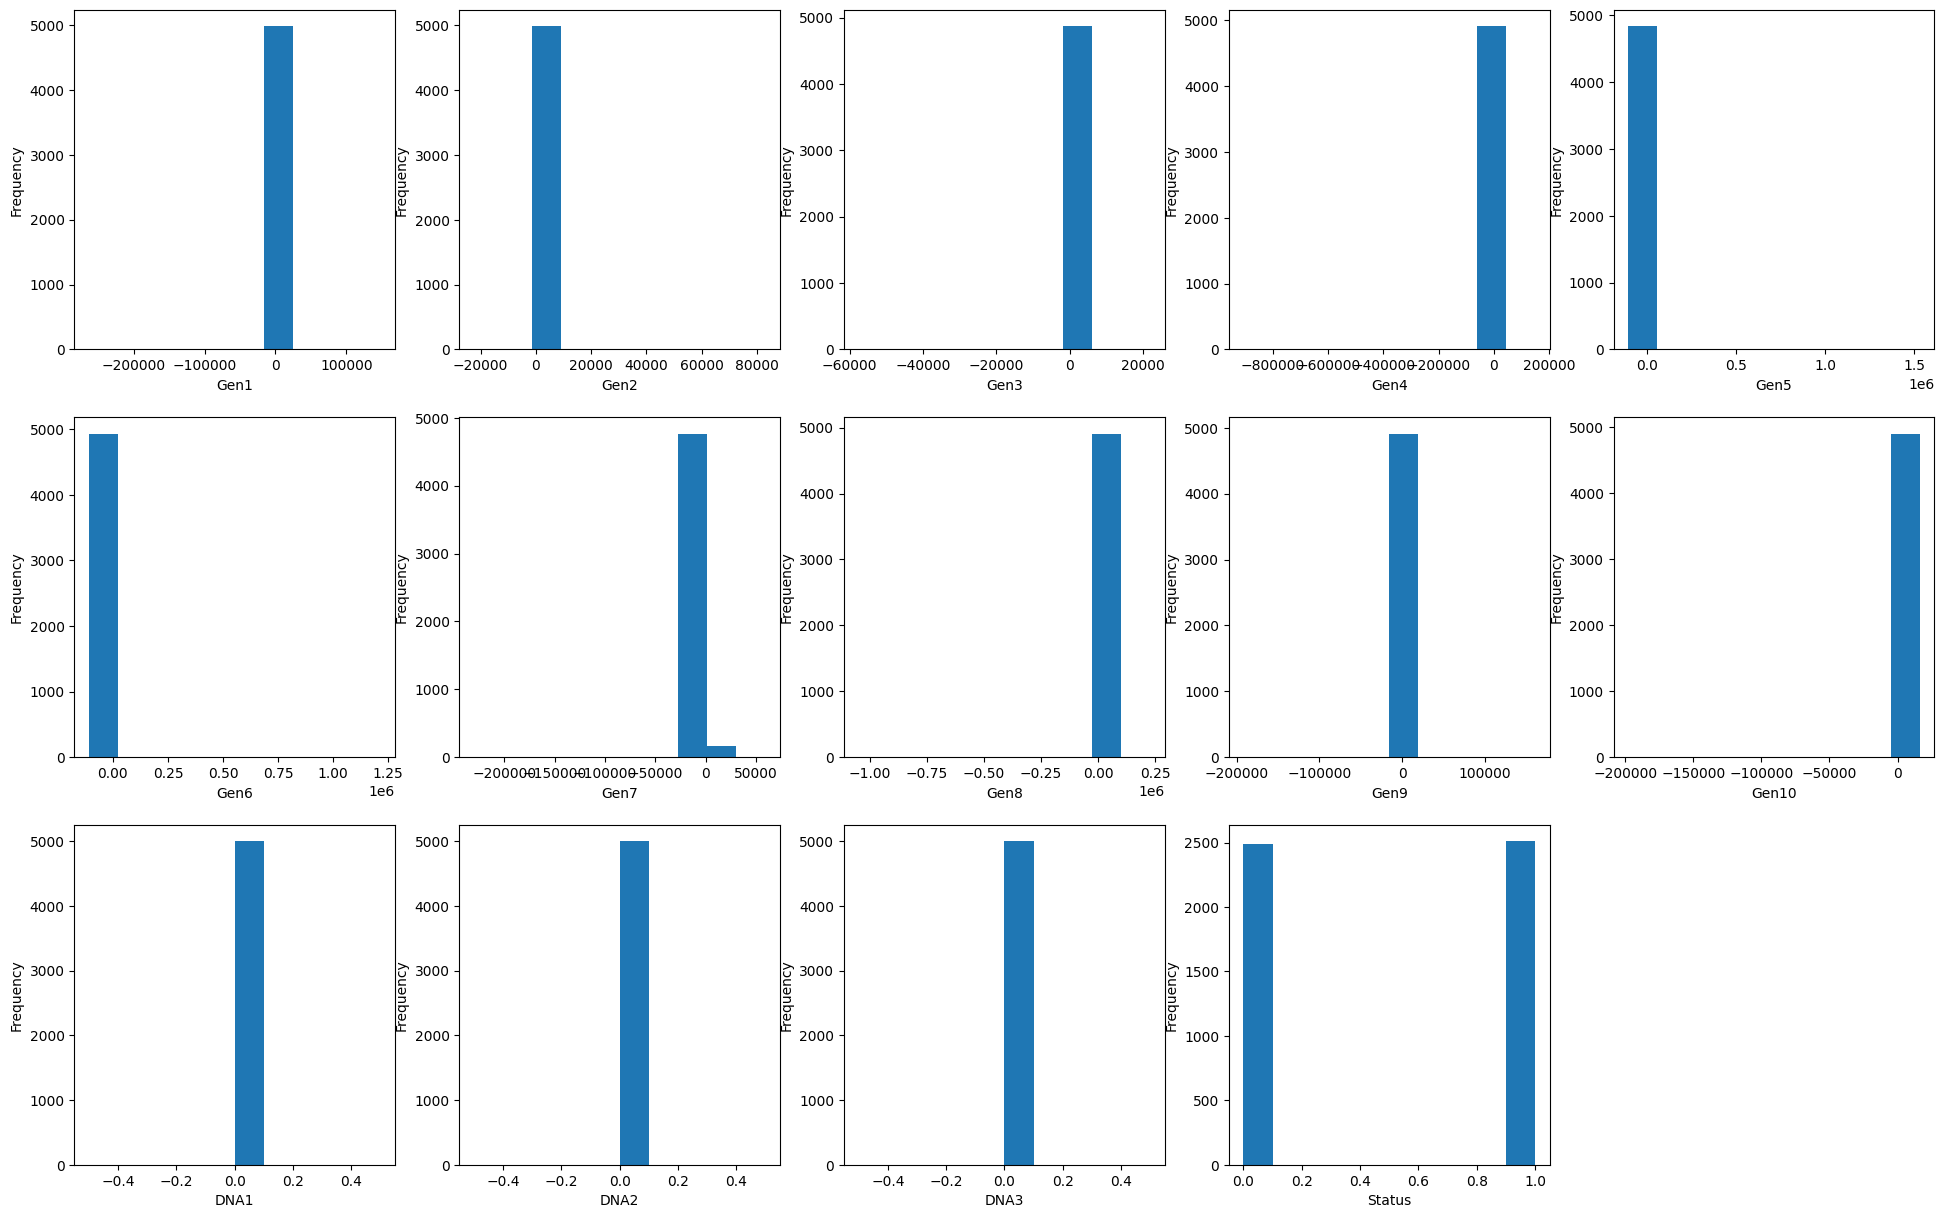

In [ ]:
fig =plt.figure(figsize=(24,15))
i = 0
for column in df_Qgen:
    sub = fig.add_subplot(3, 5,i + 1)
    sub.set_xlabel(column)
    df_Qgen[column].plot(kind = 'hist')
    i = i +1

*Distribuciones de potencia activa demandada en cada nodo PQ*

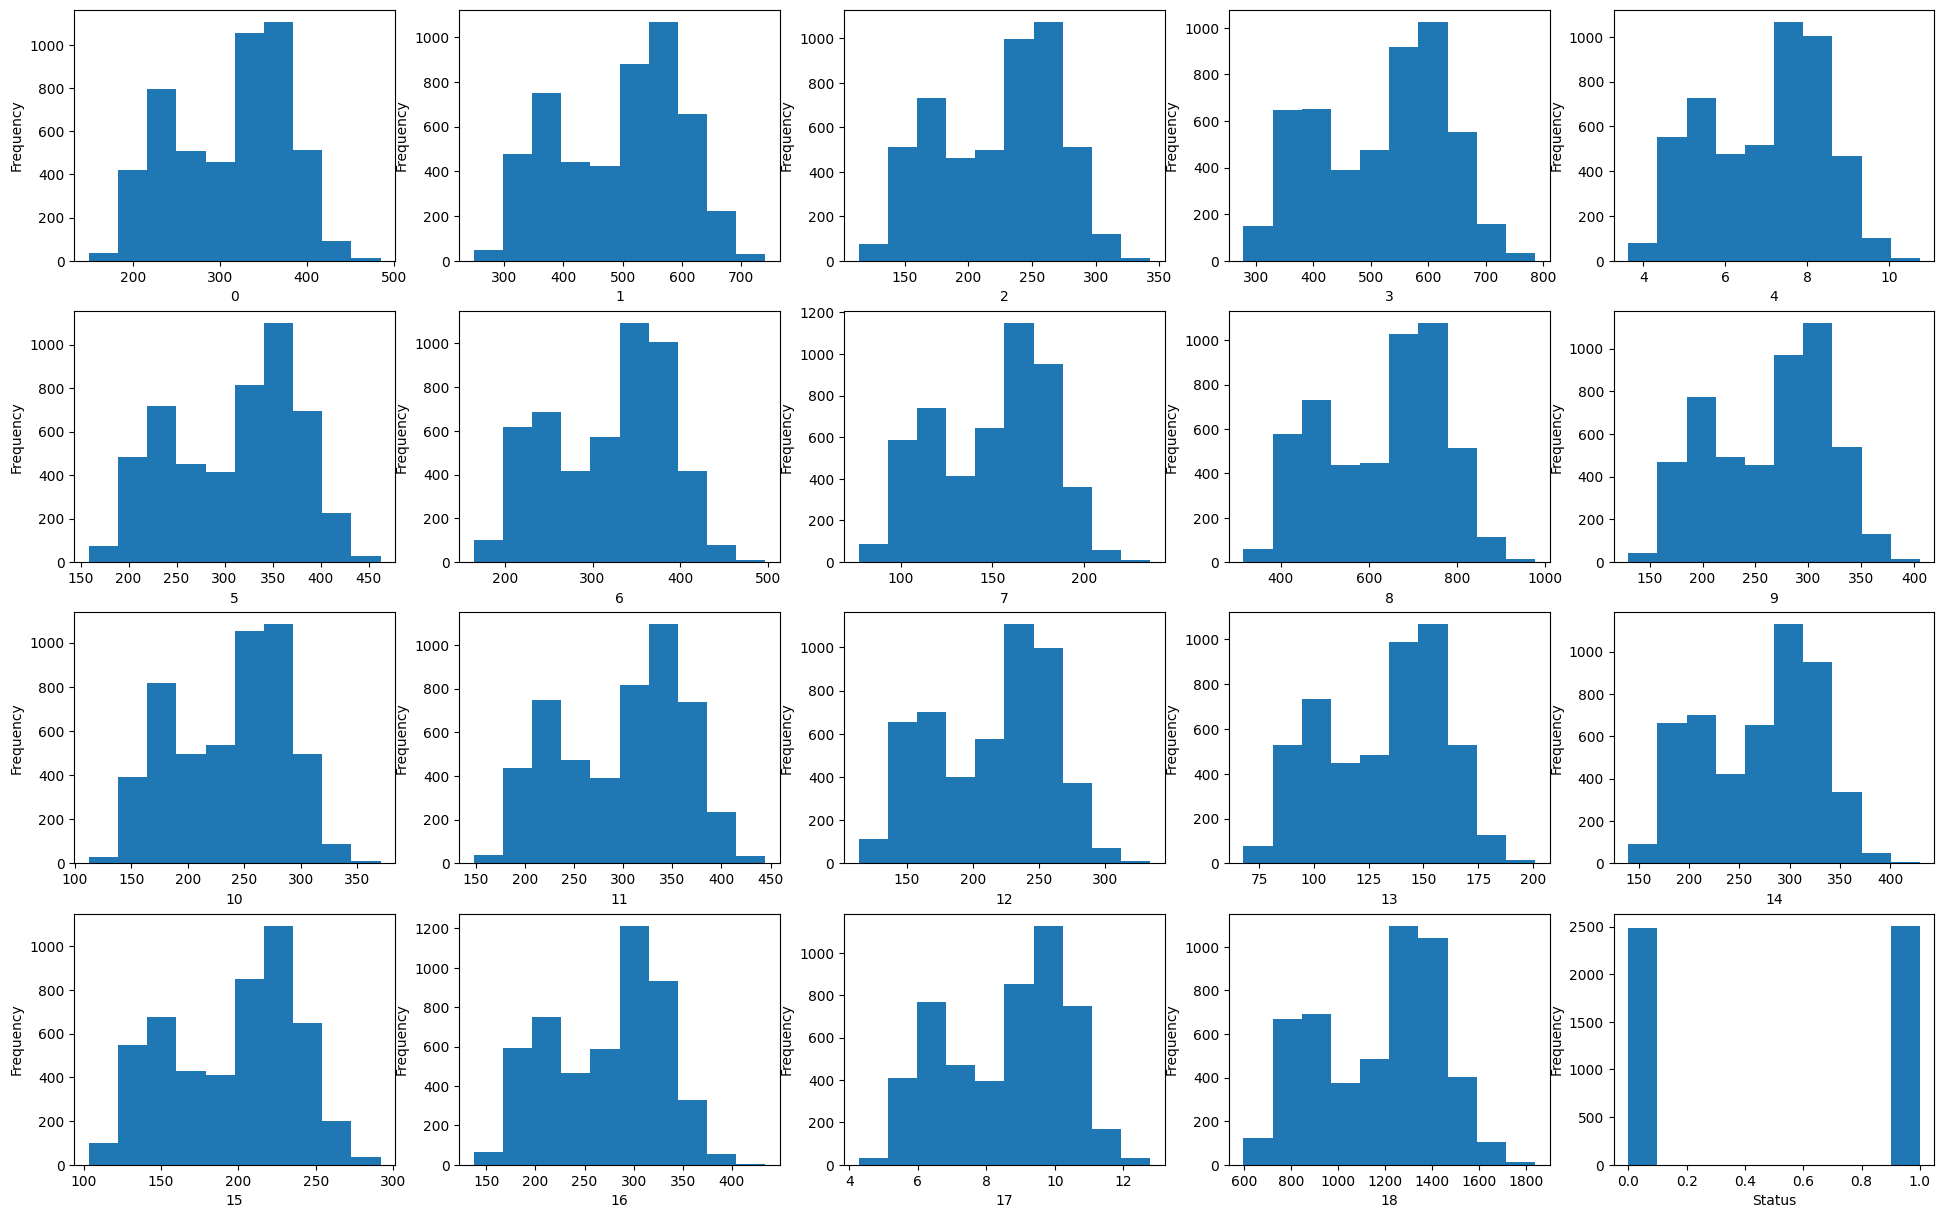

In [ ]:
fig =plt.figure(figsize=(24,15))
i = 0
for column in df_Pload:
    sub = fig.add_subplot(4, 5,i + 1)
    sub.set_xlabel(column)
    df_Pload[column].plot(kind = 'hist')
    i = i +1

*Distribuciones de potencia reactiva demandada en cada nodo PQ*

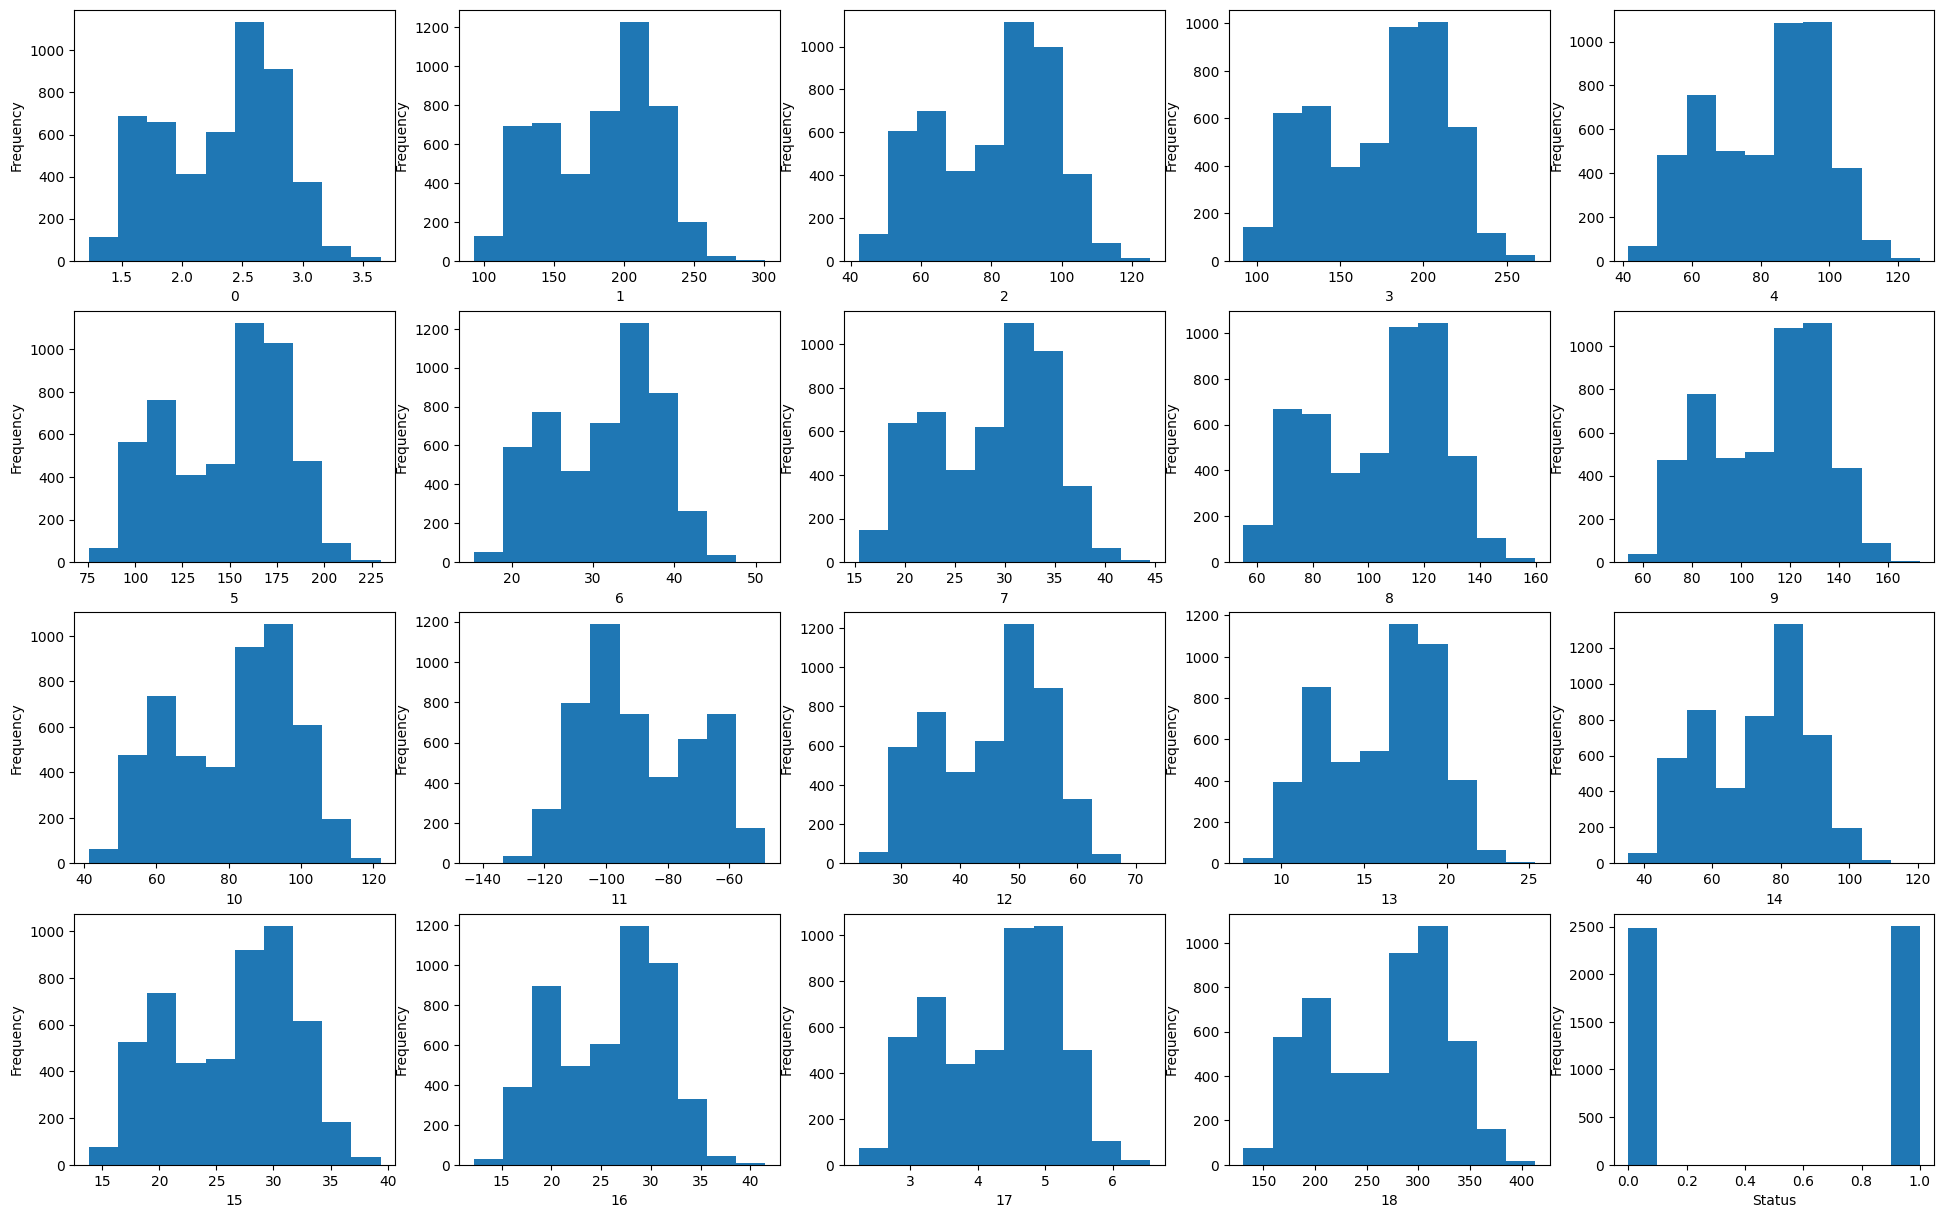

In [ ]:
fig =plt.figure(figsize=(24,15))
i = 0
for column in df_Qload:
    sub = fig.add_subplot(4, 5,i + 1)
    sub.set_xlabel(column)
    df_Qload[column].plot(kind = 'hist')
    i = i +1

*Matriz de correlación para P generada del sistema (Generadores)*

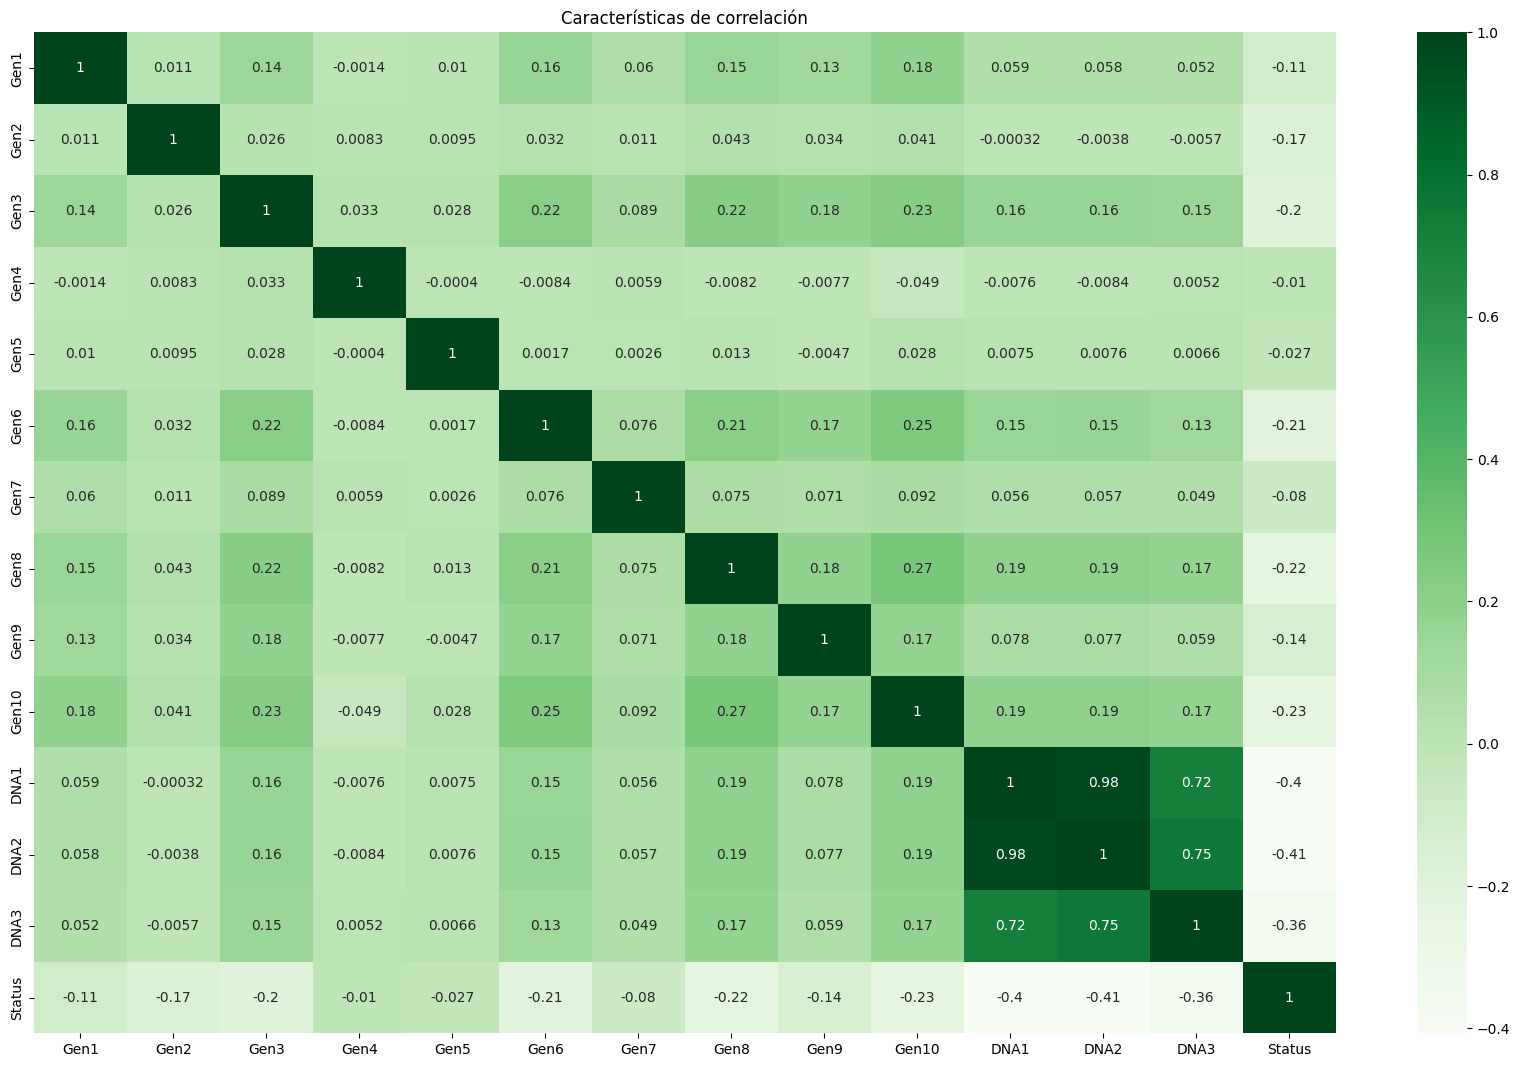

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(df_Pgen.corr(), cmap='Greens', annot=True)
plt.title('Características de correlación');

*Matriz de correlación para Q generada del sistema (Generadores)*

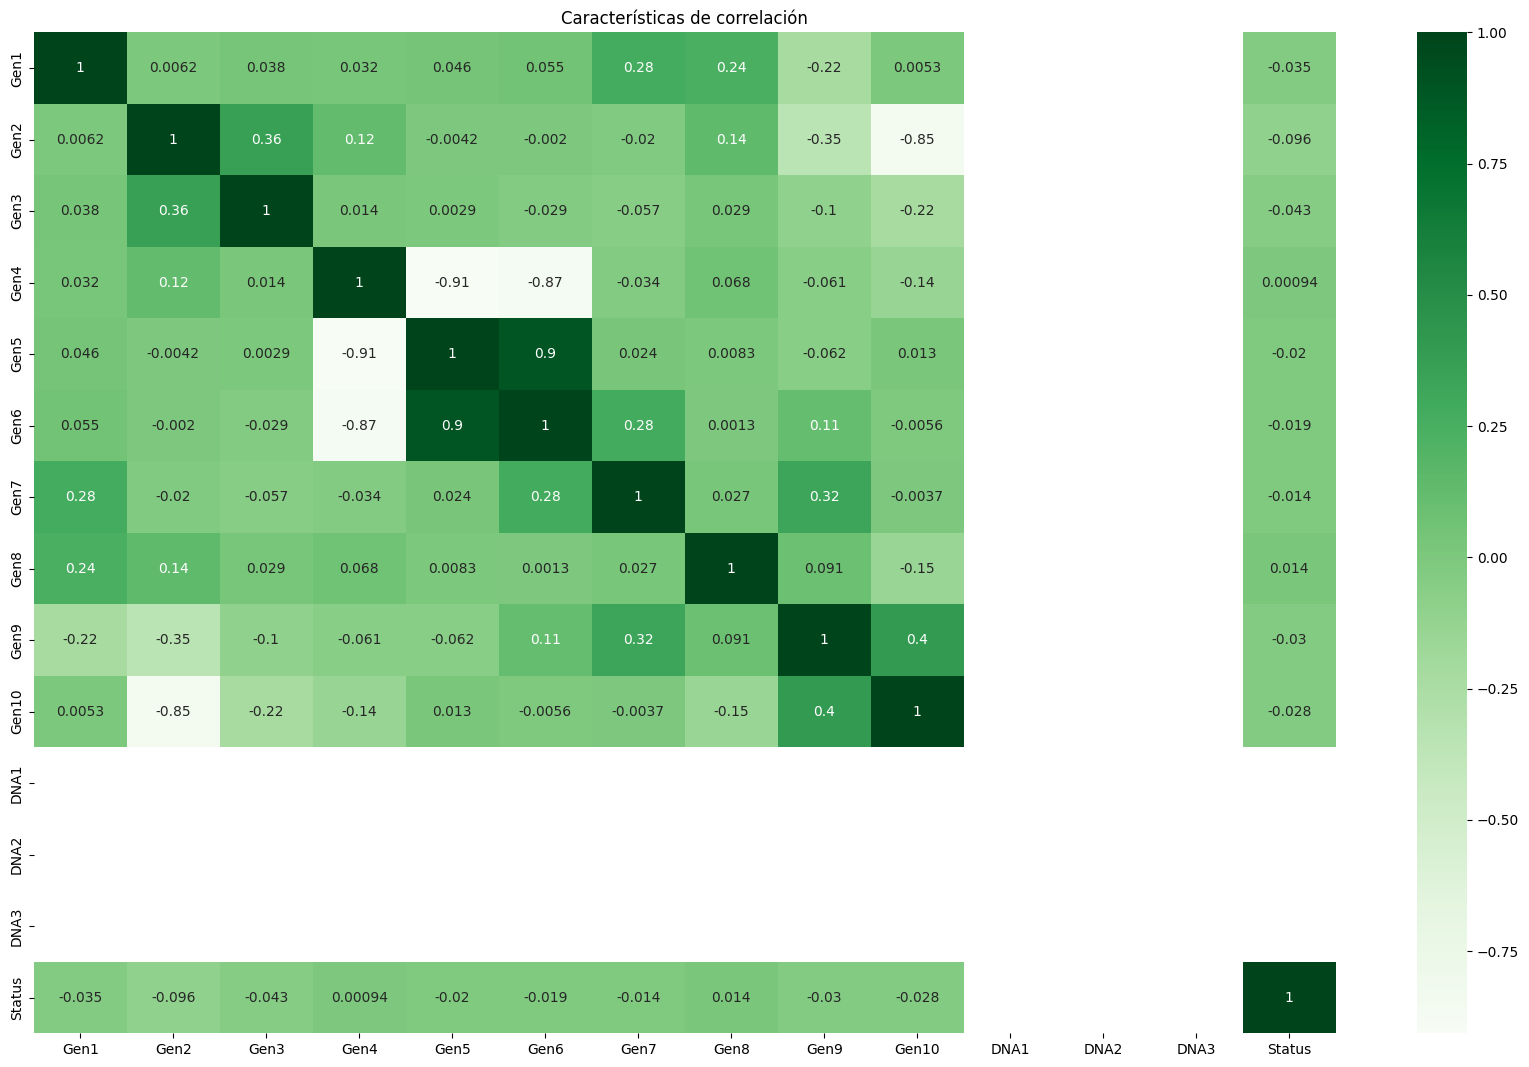

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(df_Qgen.corr(), cmap='Greens', annot=True)
plt.title('Características de correlación');

*Matriz de correlación para P demandada en cada nodo PQ*

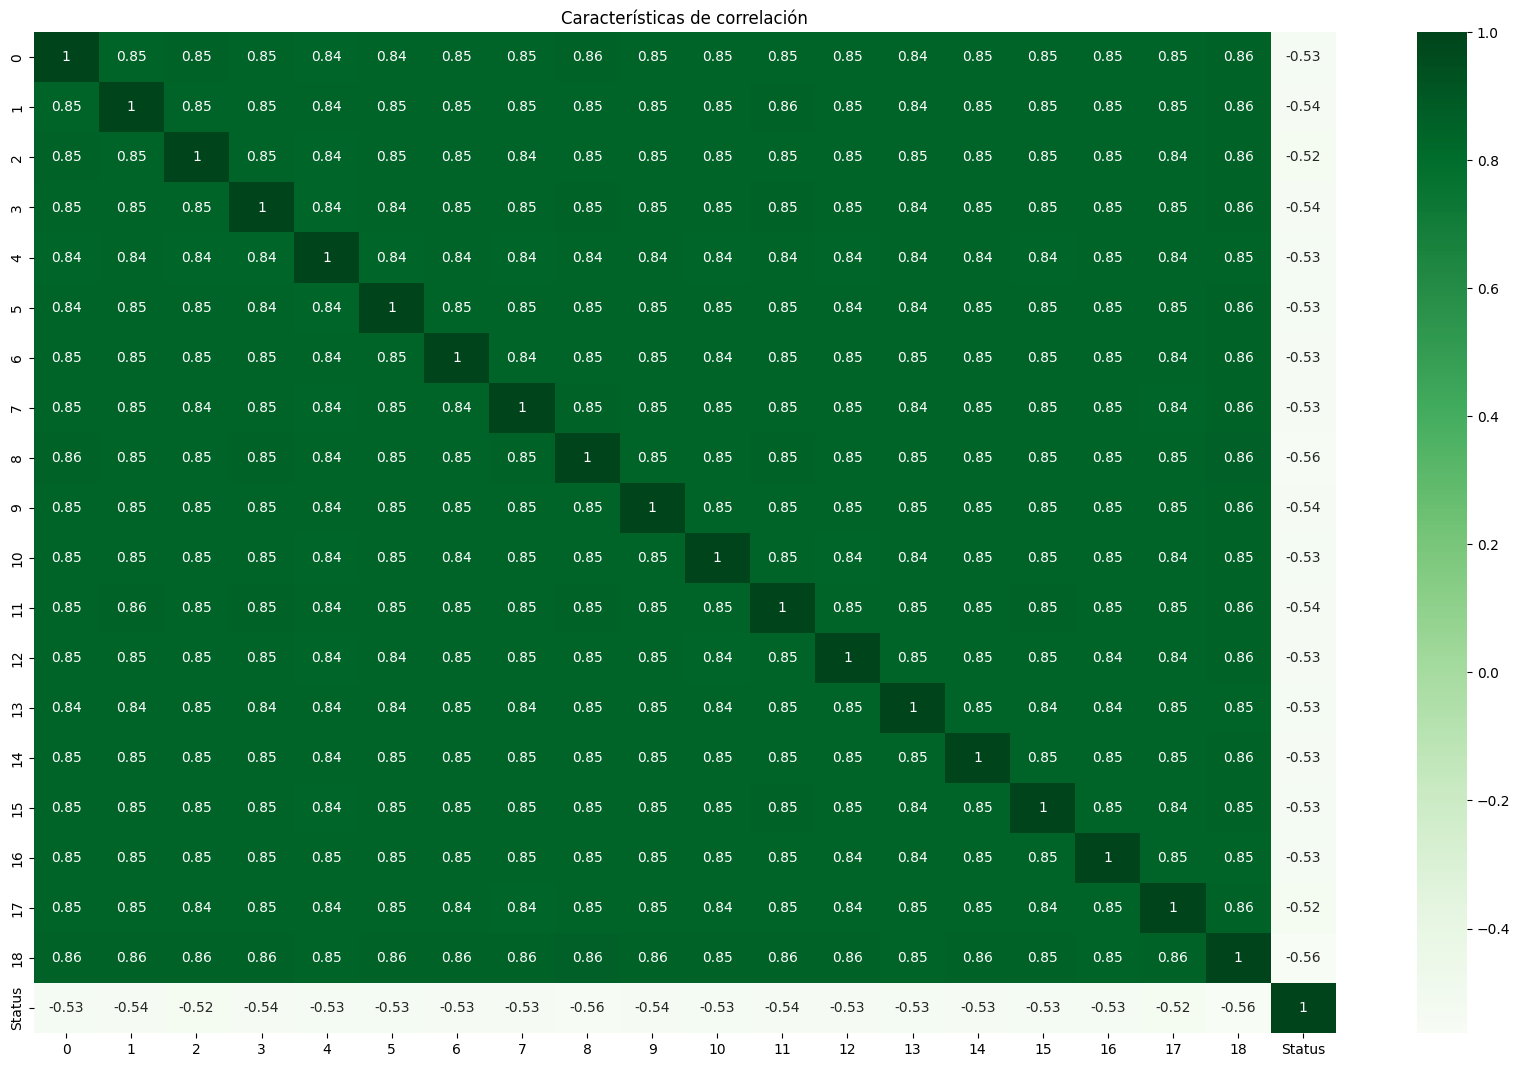

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(df_Pload.corr(), cmap='Greens', annot=True)
plt.title('Características de correlación');

*Matriz de correlación para Q demandada para cada nodo PQ*

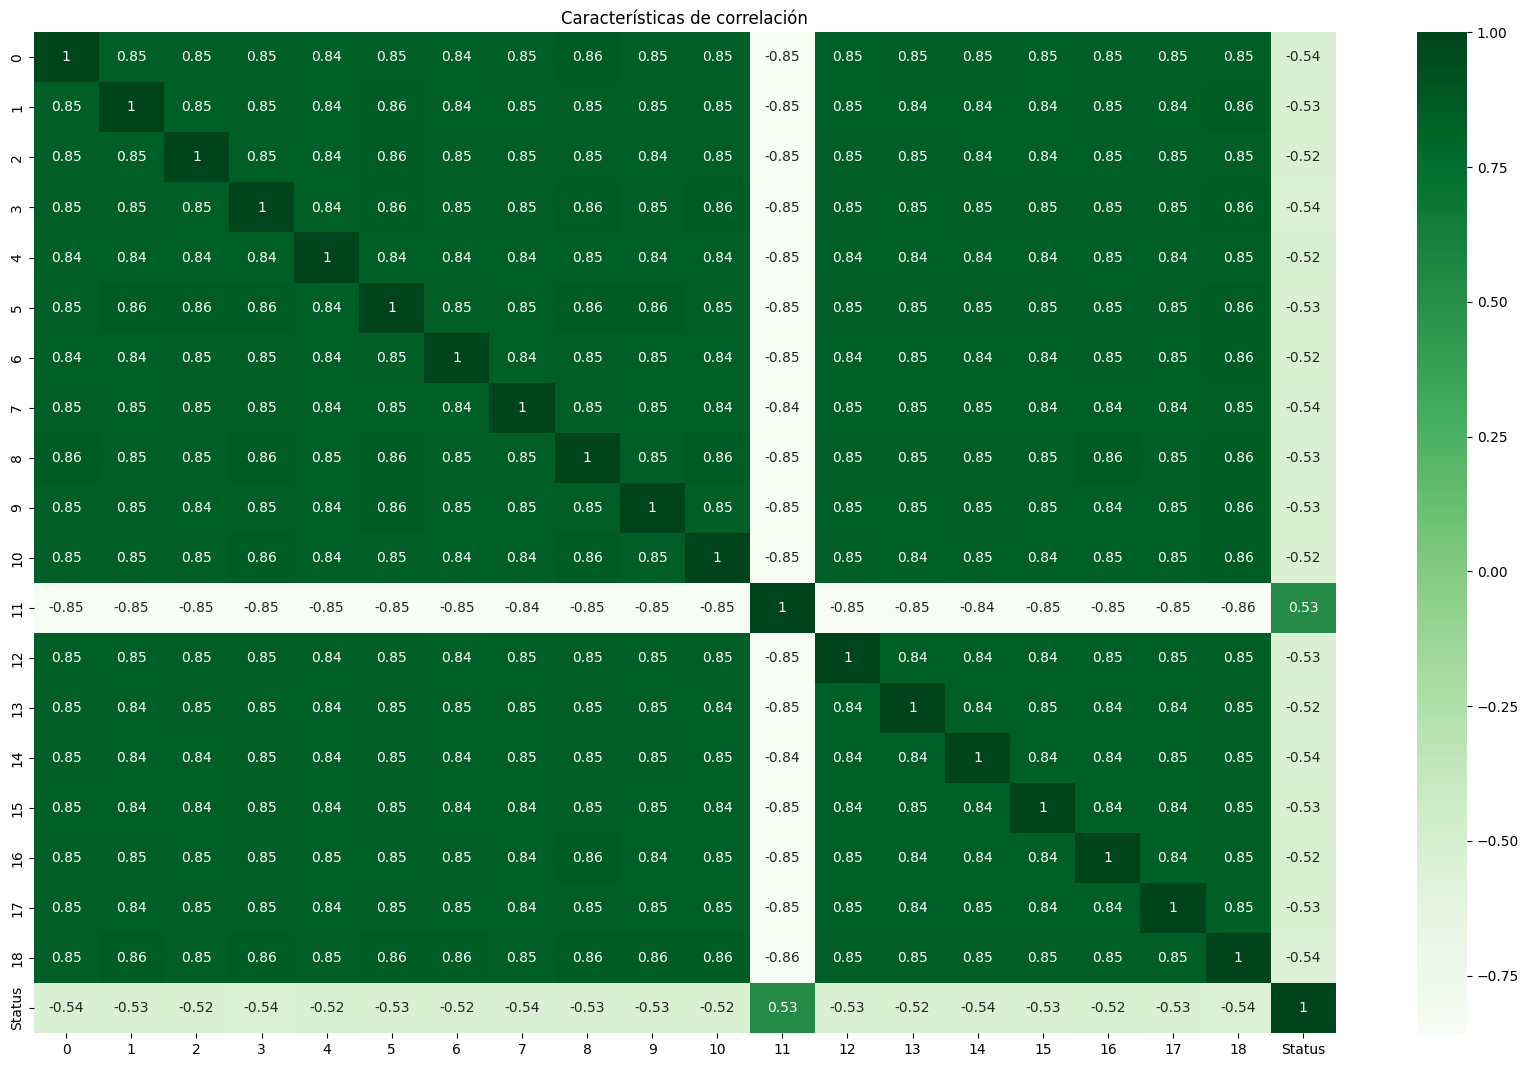

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(df_Qload.corr(), cmap='Greens', annot=True)
plt.title('Características de correlación');

Hasta aqui voy

In [ ]:
def sign(fval: float)-> str:
  return "+" if fval >= 0 else "-"


def print_rect(id_experiment: int = 0) -> None:
  for i,power in enumerate(PLOAD[id_experiment,:]):
    reactive = QLOAD[id_experiment,i]
    s_reactive = sign(reactive)
    print(f'{power:.2f} {s_reactive} j {abs(reactive):.2f}')

In [ ]:
class Net(nn.Module):
  def __init__(self, first_layers_size):
    super().__init__()
    self.fc1 = nn.Linear(first_layers_size, first_layers_size//2)
    self.fc2 = nn.Linear(first_layers_size//2, 2*first_layers_size)
    self.fc3 = nn.Linear(2*first_layers_size, (first_layers_size*3)//2)
    self.fc4 = nn.Linear((first_layers_size*3)//2, first_layers_size//2)
    self.fc5 = nn.Linear(first_layers_size//2, 1)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return x

net = Net(powers//2)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:

EPOCHS = 2
BATCHES_DISPLAY_STEP = 2000

trainloader = []
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % BATCHES_DISPLAY_STEP == BATCHES_DISPLAY_STEP - 1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training
